# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

#### Carregando os pacotes

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base

In [20]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
previsao.shape ['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']

(15000, 16)

#### Limintando a base às variáveis estudadas

In [21]:
qualitativas = previsao[['data_ref','sexo','posse_de_veiculo','posse_de_imovel','tipo_renda',
                         'educacao', 'estado_civil','tipo_residencia', 'mau']]
qualitativas

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa,False


In [22]:
qualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_ref          15000 non-null  object
 1   sexo              15000 non-null  object
 2   posse_de_veiculo  15000 non-null  bool  
 3   posse_de_imovel   15000 non-null  bool  
 4   tipo_renda        15000 non-null  object
 5   educacao          15000 non-null  object
 6   estado_civil      15000 non-null  object
 7   tipo_residencia   15000 non-null  object
 8   mau               15000 non-null  bool  
dtypes: bool(3), object(6)
memory usage: 747.2+ KB


In [23]:
qualitativas['data_ref'] = pd.to_datetime(qualitativas['data_ref'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_28512\1195970077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualitativas['data_ref'] = pd.to_datetime(qualitativas['data_ref'])


In [24]:
qualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_ref          15000 non-null  datetime64[ns]
 1   sexo              15000 non-null  object        
 2   posse_de_veiculo  15000 non-null  bool          
 3   posse_de_imovel   15000 non-null  bool          
 4   tipo_renda        15000 non-null  object        
 5   educacao          15000 non-null  object        
 6   estado_civil      15000 non-null  object        
 7   tipo_residencia   15000 non-null  object        
 8   mau               15000 non-null  bool          
dtypes: bool(3), datetime64[ns](1), object(5)
memory usage: 747.2+ KB


#### Gráficos de distribuição de variáveis qualitativas com 2 cortes

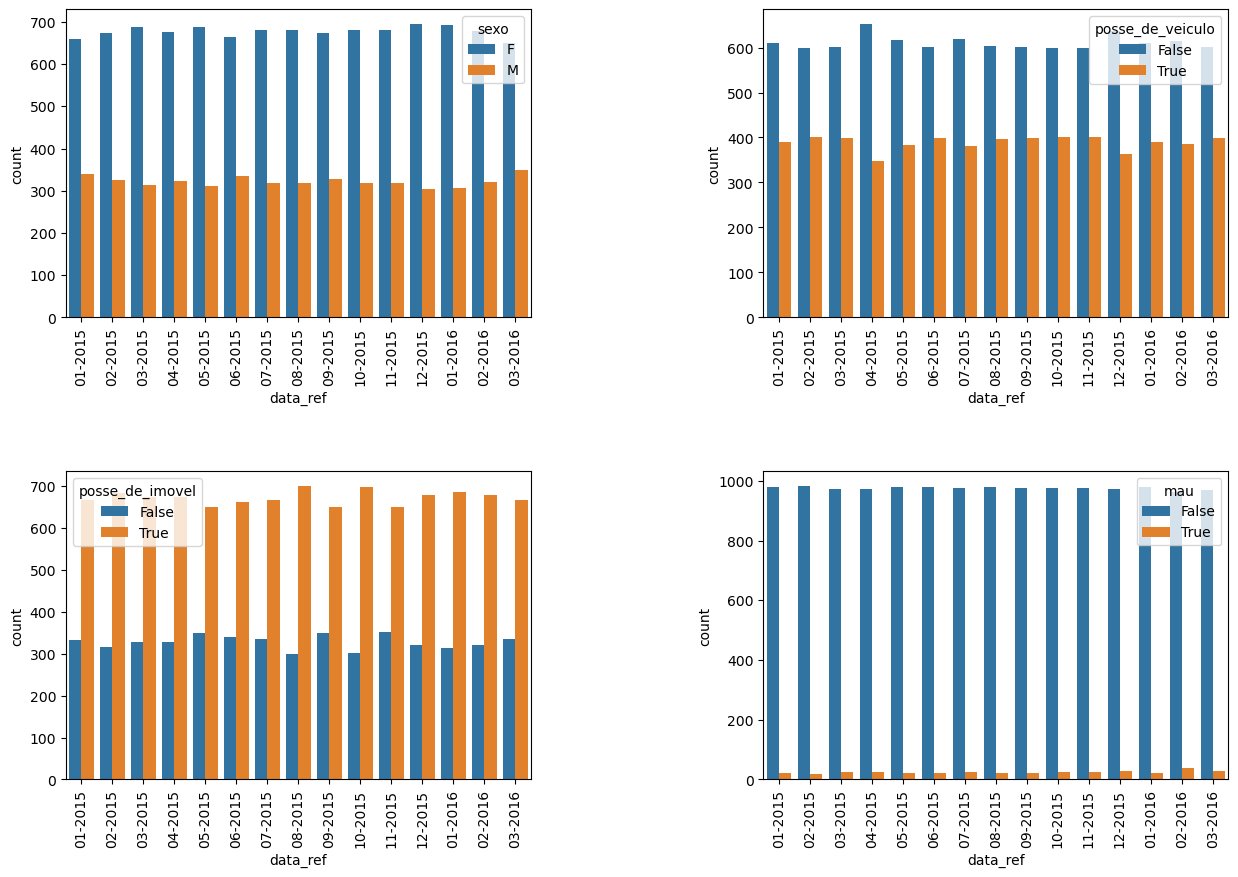

In [68]:
                    fig, axes = plt.subplots(2,2)
                    plt.subplots_adjust(wspace=0.5, hspace=0.5)
                    tick_labs = qualitativas['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

                    sns.countplot( ax= axes[0,0], x='data_ref',  hue = 'sexo', data=qualitativas)
                    sns.countplot(ax= axes[0,1], x='data_ref',  hue = 'posse_de_veiculo', data=qualitativas)
                    sns.countplot(ax= axes[1,0], x='data_ref',  hue = 'posse_de_imovel', data=qualitativas)
                    sns.countplot(ax= axes[1,1], x='data_ref',  hue = 'mau', data=qualitativas)
                    




                    labels = axes[0,0].set_xticklabels(tick_labs, rotation=90)
                    labels = axes[0,1].set_xticklabels(tick_labs, rotation=90)
                    labels = axes[1,0].set_xticklabels(tick_labs, rotation=90)
                    labels = axes[1,1].set_xticklabels(tick_labs, rotation=90)


plt.rc('figure', figsize=(15, 8))


#### Observação 1 : 
##### Pode-se perceber por meio das distribuições de frequências no tempo das variáveis qualitativas que não há variações significativas durante o período considerado

#### Gráficos de distribuição de variáveis qualitativas com mais de 3 cortes

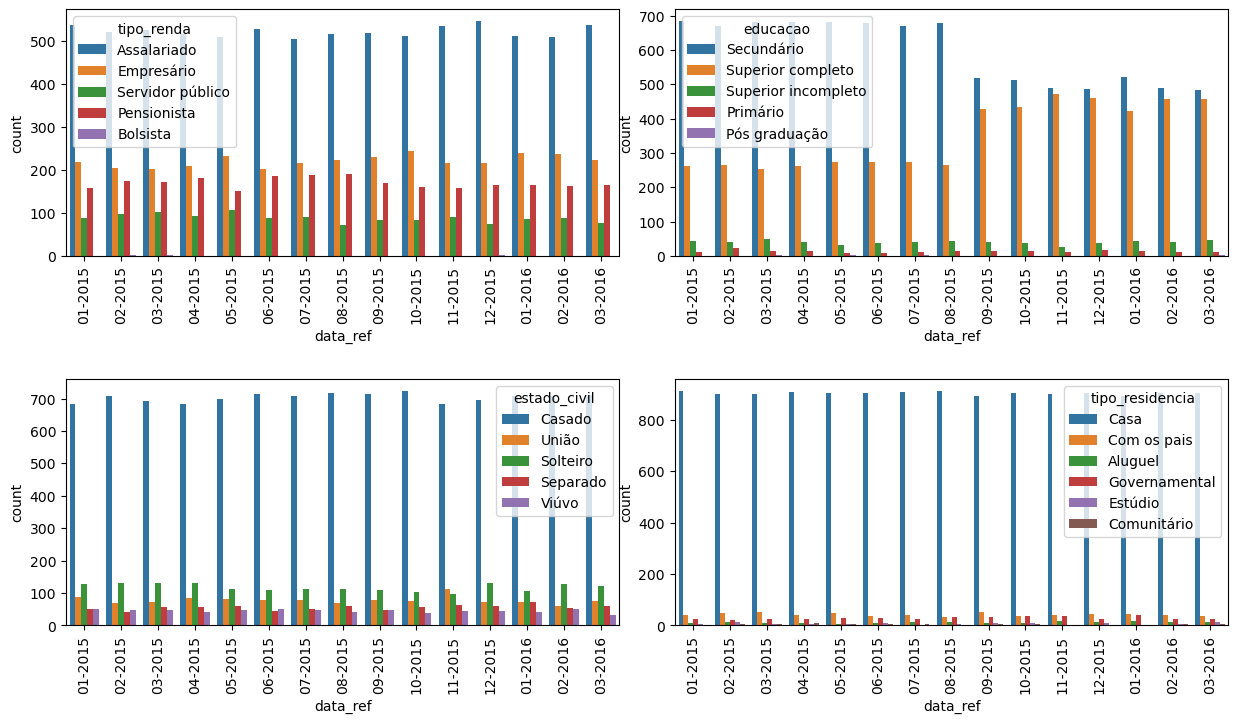

In [82]:
fig, axes = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
tick_labs = qualitativas['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

sns.countplot(ax= axes[0,0], x='data_ref',  hue = 'tipo_renda', data=qualitativas)
sns.countplot(ax= axes[0,1], x='data_ref',  hue = 'educacao', data=qualitativas)
sns.countplot(ax= axes[1,0], x='data_ref',  hue = 'estado_civil', data=qualitativas)
sns.countplot(ax= axes[1,1], x='data_ref',  hue = 'tipo_residencia', data=qualitativas)




labels = axes[0,0].set_xticklabels(tick_labs, rotation=90)
labels = axes[0,1].set_xticklabels(tick_labs, rotation=90)
labels = axes[1,0].set_xticklabels(tick_labs, rotation=90)
labels = axes[1,1].set_xticklabels(tick_labs, rotation=90)


#### Observação 2:
##### Analisando as distribuições das variáveis acima percebe-se que a variável educação sofre uma variação significativa no mês de setembro de 2015 . A partir dessa data, a quantidade de pessoas com nível secundário diminuiu enquanto que nível superior aumentou.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

#### limitando a variáveis qualitativas

In [25]:
quant = previsao[['data_ref','qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

In [29]:
quant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   qtd_filhos             15000 non-null  int64         
 2   idade                  15000 non-null  int64         
 3   tempo_emprego          12466 non-null  float64       
 4   qt_pessoas_residencia  15000 non-null  float64       
 5   renda                  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 703.2 KB


In [27]:
quant['data_ref'] = pd.to_datetime(quant['data_ref'])

C:\Users\Samsung\AppData\Local\Temp\ipykernel_28512\2578492856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quant['data_ref'] = pd.to_datetime(quant['data_ref'])


In [28]:
quant


,data_ref,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,1,36,3.575342,3.0,3369.24
1,2015-01-01,0,42,0.860274,2.0,6096.14
2,2015-01-01,2,31,8.065753,4.0,5658.98
3,2015-01-01,0,50,1.208219,2.0,7246.69
4,2015-01-01,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...
14995,2016-03-01,1,37,2.046575,3.0,1193.29
14996,2016-03-01,1,30,12.079452,3.0,2519.18
14997,2016-03-01,0,40,2.161644,2.0,1586.85
14998,2016-03-01,0,47,3.295890,2.0,6975.39


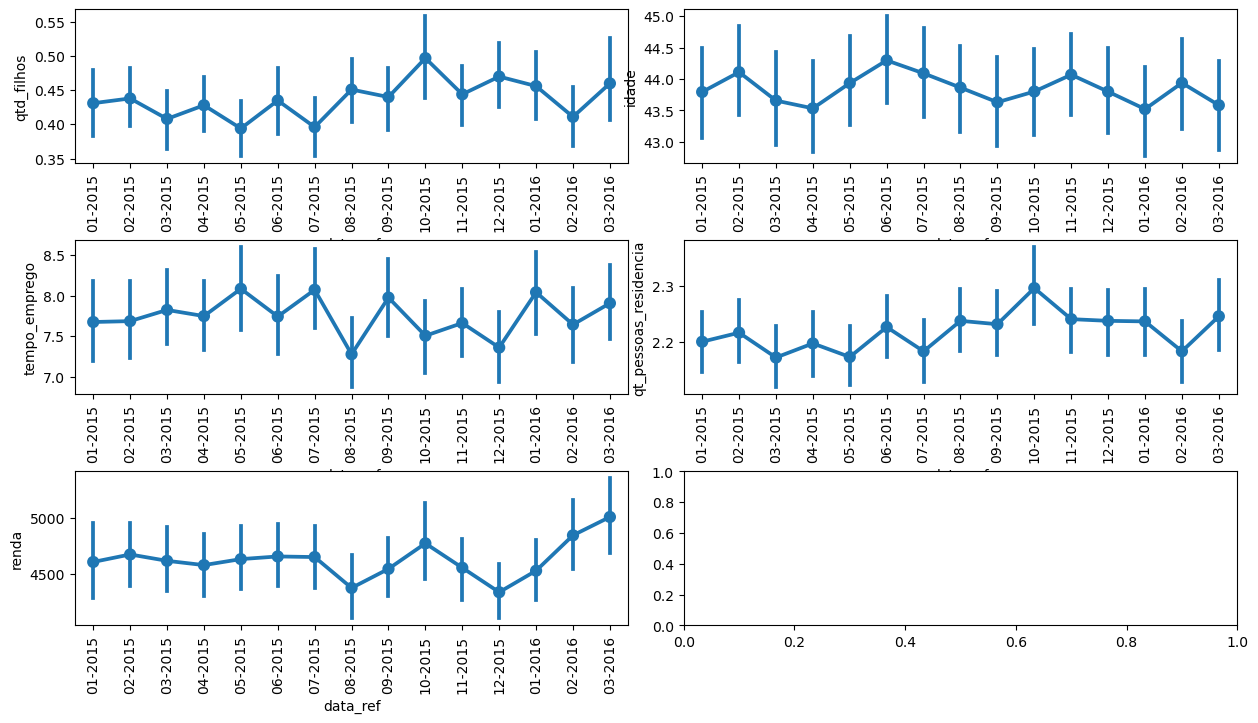

In [33]:
fig, axes = plt.subplots(3,2)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
tick_labs = quant['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

sns.pointplot(ax= axes[0,0], x='data_ref',  y = 'qtd_filhos', data=quant)
sns.pointplot(ax= axes[0,1], x='data_ref',  y = 'idade', data=quant)
sns.pointplot(ax= axes[1,0], x='data_ref',  y = 'tempo_emprego', data=quant)
sns.pointplot(ax= axes[1,1], x='data_ref',  y = 'qt_pessoas_residencia', data=quant)
sns.pointplot(ax= axes[2,0], x='data_ref',  y = 'renda', data=quant)



labels = axes[0,0].set_xticklabels(tick_labs, rotation=90)
labels = axes[0,1].set_xticklabels(tick_labs, rotation=90)
labels = axes[1,0].set_xticklabels(tick_labs, rotation=90)
labels = axes[1,1].set_xticklabels(tick_labs, rotation=90)
labels = axes[2,0].set_xticklabels(tick_labs, rotation=90)



plt.rc('figure', figsize=(15, 8))